In [14]:
from skimage import data, feature, transform
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from itertools import chain
from sklearn.datasets import fetch_lfw_people
from sklearn.feature_extraction.image import PatchExtractor
import numpy as np

In [3]:
human_faces = fetch_lfw_people()
positive_images = human_faces.images[:10000]
print(positive_images.shape)

(10000, 62, 47)


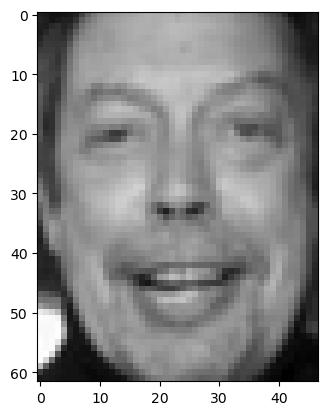

In [4]:
plt.imshow(positive_images[0], cmap='gray')
plt.show()

In [9]:
non_face_topics = ['moon', 'text', 'coins']
negative_samples = [(getattr(data, name)()) for name in non_face_topics]

def generate_random_samples(image, num_of_generated_images=100, patch_size=positive_images[0].shape):
    extractor = PatchExtractor(patch_size=patch_size, max_patches=num_of_generated_images, random_state=42)
    patches = extractor.transform((image[np.newaxis]))
    return patches

In [11]:
negative_images = np.vstack([generate_random_samples(im, 1000) for im in negative_samples])

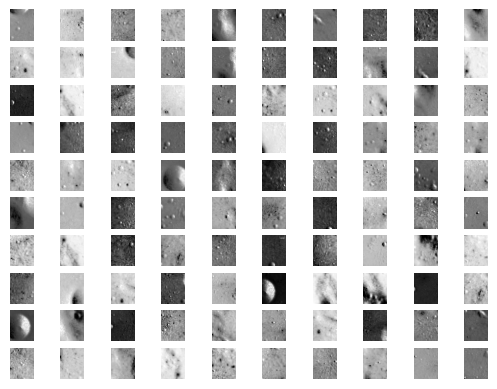

In [12]:
fig, ax = plt.subplots(10, 10)

for i, axis in enumerate(ax.flat):
    axis.imshow(negative_images[i], cmap='gray')
    axis.axis('off')
plt.show()

In [24]:
X_train = np.array([feature.hog(image) for image in chain(positive_images, negative_images)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_images.shape[0]] = 1

In [25]:
svm = LinearSVC()
svm.fit(X_train, y_train)

/Users/caelyasutake/anaconda3/envs/MachineLearning/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

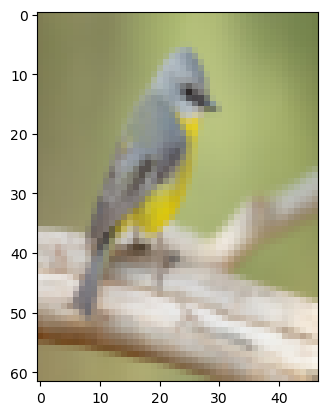

In [32]:
test_image = imread(fname='bird.jpeg')
test_image = transform.resize(test_image, positive_images[0].shape)

plt.imshow(test_image, cmap='gray')
plt.show()

In [33]:
test_image_hog = np.array([feature.hog(test_image, channel_axis=2)])
prediction = svm.predict(test_image_hog)
print('Prediction made by SVM: %f' % prediction)

Prediction made by SVM: 0.000000


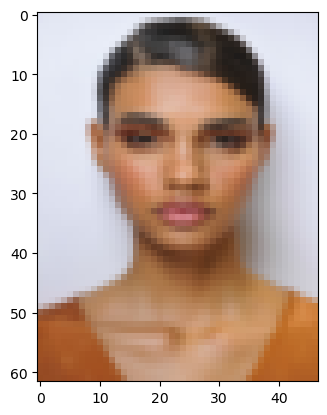

Prediction made by SVM 1.000000


In [35]:
test_image = imread(fname='female.jpeg')
test_image = transform.resize(test_image, positive_images[0].shape)

plt.imshow(test_image, cmap='gray')
plt.show()

test_image_hog = np.array([feature.hog(test_image, channel_axis=2)])
prediction = svm.predict(test_image_hog)
print('Prediction made by SVM %f' % prediction)